In [17]:
import pandas as pd

In [20]:
parallel_inner_df = pd.read_csv('../parallel_inner_report.txt', delimiter=' ', header=None)
parallel_inner_df.columns = ["n", "r", "elapsed_time"]
parallel_outer_df = pd.read_csv('../parallel_outer_report.txt', delimiter=' ', header=None)
parallel_outer_df.columns = ["n", "r", "elapsed_time"]
sequential_df = pd.read_csv('../sequence_report.txt', delimiter=' ', header=None)
sequential_df.columns = ["n", "r", "elapsed_time"]

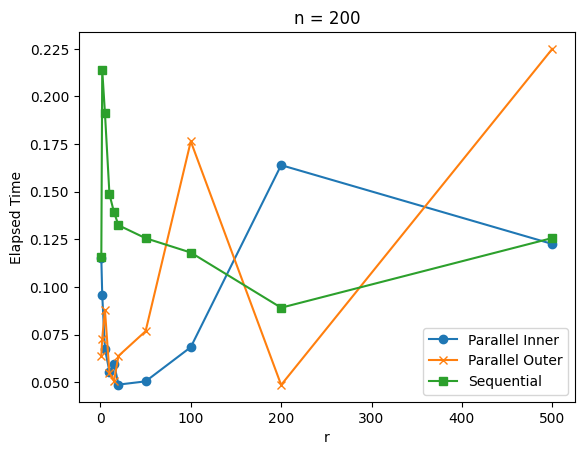

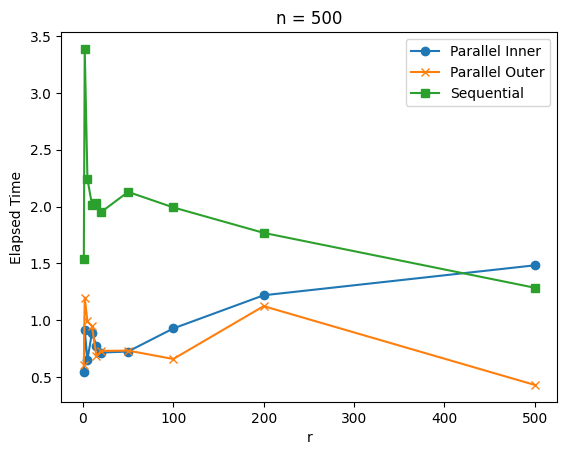

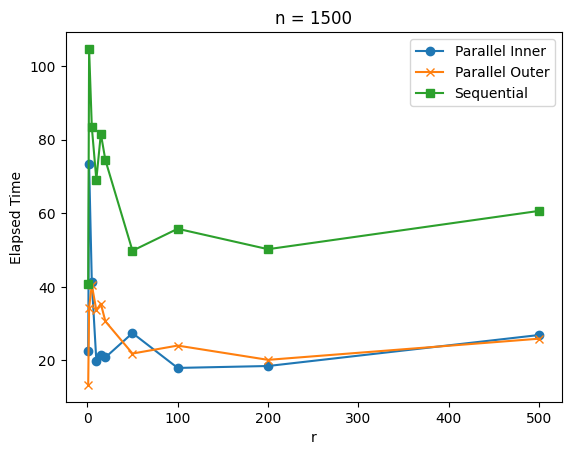

In [21]:
from matplotlib import pyplot as plt

# Get unique values of 'n'
unique_n_values = parallel_inner_df['n'].unique()

# Create a separate plot for each 'n'
for n_value in unique_n_values:
    # Filter the data for the current 'n'
    parallel_inner_data = parallel_inner_df[parallel_inner_df['n'] == n_value]
    parallel_outer_data = parallel_outer_df[parallel_outer_df['n'] == n_value]
    sequential_data = sequential_df[sequential_df['n'] == n_value]

    # Create a new figure and axis for the plot
    plt.figure()
    
    # Plot data for parallel_inner_df
    plt.plot(parallel_inner_data['r'], parallel_inner_data['elapsed_time'], label='Parallel Inner', marker='o')

    # Plot data for parallel_outer_df
    plt.plot(parallel_outer_data['r'], parallel_outer_data['elapsed_time'], label='Parallel Outer', marker='x')

    # Plot data for sequential_df
    plt.plot(sequential_data['r'], sequential_data['elapsed_time'], label='Sequential', marker='s')

    # Set labels and title
    plt.xlabel('r')
    plt.ylabel('Elapsed Time')
    plt.title(f'n = {n_value}')

    # Add legend
    plt.legend()

    # Show or save the plot
    plt.show()  # You ca

In [43]:
result = pd.merge(pd.merge(sequential_df, parallel_inner_df, on=['n', 'r'], suffixes=("_seq", "_parallel_in")), parallel_outer_df, on=['n', 'r'])
result = result.rename(columns={"elapsed_time": "elapsed_time_parallel_out"})

In [44]:
grouped = result.groupby('n')

In [52]:
result.groupby('n').apply(display)

,n,r,elapsed_time_seq,elapsed_time_parallel_in,elapsed_time_parallel_out
0,200,1,0.115812,0.115035,0.063898
1,200,2,0.213993,0.095840,0.072952
2,200,5,0.191371,0.067525,0.088009
3,200,10,0.148644,0.055596,0.054817
4,200,15,0.139265,0.059680,0.050625
5,200,20,0.132402,0.048773,0.063827
6,200,50,0.125597,0.050472,0.076811
7,200,100,0.118077,0.068433,0.176439
8,200,200,0.089119,0.163946,0.048605
9,200,500,0.125688,0.122582,0.224937


,n,r,elapsed_time_seq,elapsed_time_parallel_in,elapsed_time_parallel_out
10,500,1,1.53739,0.544892,0.607334
11,500,2,3.38743,0.912519,1.198320
12,500,5,2.24302,0.651398,0.987929
13,500,10,2.01669,0.890022,0.946609
14,500,15,2.02959,0.770608,0.679974
15,500,20,1.95037,0.714173,0.729005
16,500,50,2.12872,0.723763,0.731780
17,500,100,1.99225,0.926681,0.657794
18,500,200,1.76820,1.218750,1.123010
19,500,500,1.28516,1.482380,0.429560


,n,r,elapsed_time_seq,elapsed_time_parallel_in,elapsed_time_parallel_out
20,1500,1,40.6705,22.4700,13.3252
21,1500,2,104.6910,73.4253,34.2932
22,1500,5,83.4417,41.2851,40.5343
23,1500,10,69.1223,19.9439,33.6181
24,1500,15,81.6330,21.5046,35.4170
25,1500,20,74.4724,20.8019,30.6186
26,1500,50,49.8145,27.4223,21.8567
27,1500,100,55.7861,17.9462,24.0222
28,1500,200,50.2327,18.4676,20.1423
29,1500,500,60.6511,26.8994,25.8994


""
